# Análisis de sueldos en la industria
* El DataSet con el que se hizo este análisis es extraido de Kaggle
* El DataSet se llama 'Data Professionals Salary - 2022'

In [1]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Carga de los datos

In [2]:
df = pd.read_csv(r"C:\Users\mared\Desktop\Python\Datasets_kaggle\Salary Dataset.csv")

### EDA

In [3]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [5]:
#Cuento los nulos
df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [6]:
#Eliminare las filas de los datos nulos
df.dropna(inplace=True)

In [7]:
#Dimensiones del DataFrame
df.shape

(4339, 5)

### Arreglo de columna Salary

In [8]:
#Primero identificaremos la frecuencia del salario
df['Frecuencia'] = df['Salary'].str.slice(-2)

In [9]:
#Convertimos la columna salario a float para poder usarla
#Se hara la conversión de Rupia India a Dolar a la fecha de 23/02/2022
conversion_dolar = 74.64
df['Salary'] = df['Salary'].str.slice(1,-3)
df['Salary'] = df['Salary'].str.replace(',','')

In [10]:
#Hay salarios en otra moneda por lo que no se puede transformar a float
df['Salary'].astype(float)

ValueError: could not convert string to float: 'FN 156179'

In [11]:
#Hay un solo salario que esta en moneda AFN
df['Salary'].str.contains('FN').value_counts()

False    4338
True        1
Name: Salary, dtype: int64

In [12]:
#Se hara la conversión de AFN a Dolar a la fecha de 23/02/2022
conversion_afn = 91.95

In [13]:
df['Salary'].loc[df['Salary'].str.contains('FN')] = df['Salary'].loc[df['Salary'].str.contains('FN')].str.replace('FN',
                                                                                                                 '').astype(int)/conversion_afn

In [14]:
#Se convierte a float y luego se hace el cambio a dolar
df['Salary'] = df['Salary'].astype(float)
df['Salary'] /= conversion_dolar

In [17]:
#Vemos la frecuencia de los salarios
df['Frecuencia'].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [18]:
df['Frecuencia'].value_counts()

yr    3229
mo    1088
hr      22
Name: Frecuencia, dtype: int64

In [19]:
#Se traspasara todo a frecuencia anual
horas_trabajo_semanal = 45

df['Salary'].loc[df['Frecuencia']=='hr'] = df['Salary'].loc[df['Frecuencia']=='hr']*horas_trabajo_semanal*4
df['Frecuencia'].loc[df['Frecuencia']=='hr'] = 'mo'

df['Salary'].loc[df['Frecuencia']=='mo'] = df['Salary'].loc[df['Frecuencia']=='mo']*12
df['Frecuencia'].loc[df['Frecuencia']=='mo'] = 'yr'

#Creo la nueva columna de salario
df['Salario_anual'] = df['Salary']
#Elimino la columna Salary y Frecuencia
df.drop(['Salary','Frecuencia'], axis=1,inplace=True)

In [20]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salario_anual
0,Mu Sigma,Data Scientist,105.0,Bangalore,8689.348875
1,IBM,Data Scientist,95.0,Bangalore,15969.319400
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,11212.138264
3,Impact Analytics,Data Scientist,40.0,Bangalore,8970.766345
4,Accenture,Data Scientist,32.0,Bangalore,12648.847803


### Gráficos salarios promedio según Location y Job Title

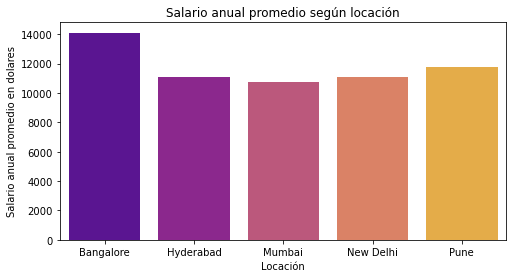

In [25]:
locacion_avg = df.groupby('Location')[['Salario_anual']].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='Location', y='Salario_anual', data=locacion_avg, palette='plasma')
plt.title('Salario anual promedio según locación')
plt.xlabel('Locación')
plt.ylabel('Salario anual promedio en dolares')
plt.show()

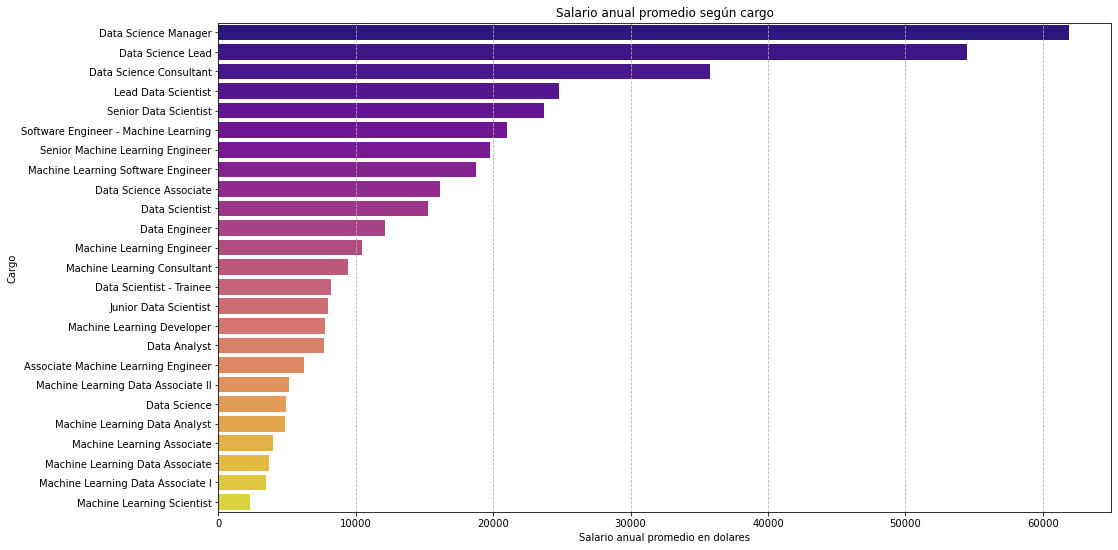

In [30]:
cargo_avg = df.groupby('Job Title')[['Salario_anual']].agg('mean').reset_index().sort_values('Salario_anual',ascending=False)
plt.figure(figsize=(16,9))
sns.barplot(y='Job Title', x='Salario_anual', data=cargo_avg, palette='plasma')
plt.title('Salario anual promedio según cargo')
plt.xlabel('Salario anual promedio en dolares')
plt.ylabel('Cargo')
plt.grid(axis = 'x', linestyle ='--')
plt.show()

Se puede ver que el sueldo anual promedio es más alto en Bangalore

En cuanto a los cargos, hay muchos... por lo que haremos una segmentación por:
* Nivel: Puede ser Junior, Associate, Senior o Manager
* Área: Puede ser Data Science, Data Engineering, Machine Learning o Data Analyst

In [31]:
df['Area'] = 'Data'

aData = df['Job Title'].str.contains('Data')
aScience = df['Job Title'].str.contains('Science')
aScientist= df['Job Title'].str.contains('Scientist')
aEngineer= df['Job Title'].str.contains('Engineer')
aMachine= df['Job Title'].str.contains('Machine')
aAnalyst= df['Job Title'].str.contains('Analyst')

df['Area'].loc[aData & (aScience|aScientist) & ~aMachine] = 'Data Science'
df['Area'].loc[aData & aEngineer] = 'Data Engineering'
df['Area'].loc[aMachine & ~(aScientist & aAnalyst)] = 'Machine Learning'
df['Area'].loc[aData & aAnalyst & ~aMachine] = 'Data Analysis'

In [39]:
df['Nivel'] = 'Associate'

aJunior = df['Job Title'].str.contains('Junior')
aTrainee = df['Job Title'].str.contains('Trainee')
aConsultant = df['Job Title'].str.contains('Consultant')
aSenior = df['Job Title'].str.contains('Senior')
aLead = df['Job Title'].str.contains('Lead')
aManager = df['Job Title'].str.contains('Manager')

df['Nivel'].loc[aJunior|aTrainee] = 'Junior'
df['Nivel'].loc[aConsultant] = 'Consultant'
df['Nivel'].loc[aLead|aSenior] = 'Senior'
df['Nivel'].loc[aManager] = 'Manager'

In [70]:
df.sample(5)

,Company Name,Job Title,Salaries Reported,Location,Salario_anual,Area,Nivel
4326,Wadhwani Institute for Artificial Intelligence,Machine Learning Engineer,1.0,Mumbai,8077.813505,Machine Learning,Associate
3054,Razorthink,Data Engineer,2.0,Bangalore,13052.438371,Data Engineering,Associate
4170,Infogain,Machine Learning Engineer,1.0,New Delhi,5528.711147,Machine Learning,Associate
3358,BookMeds,Data Engineer,1.0,Hyderabad,5446.784566,Data Engineering,Associate
660,Nestaway Technologies,Data Scientist,1.0,Bangalore,22893.086817,Data Science,Associate


In [71]:
df['Area'].value_counts()

Data Science        1955
Data Analysis        988
Data Engineering     804
Machine Learning     592
Name: Area, dtype: int64

In [72]:
df['Nivel'].value_counts()

Associate     4261
Senior          55
Junior          19
Consultant       3
Manager          1
Name: Nivel, dtype: int64

### Ahora se pueden ver de mejor forma los gráficos por cargos

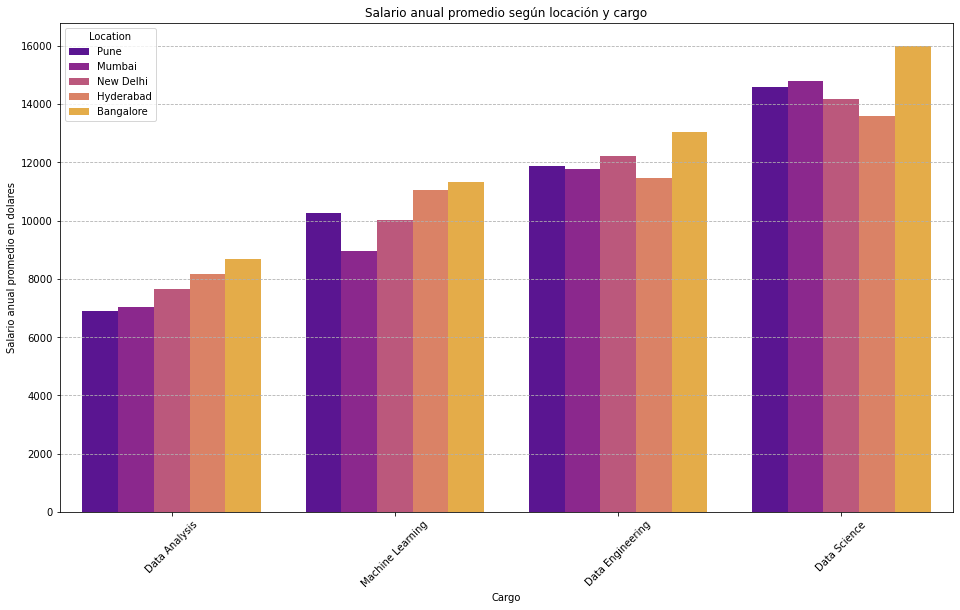

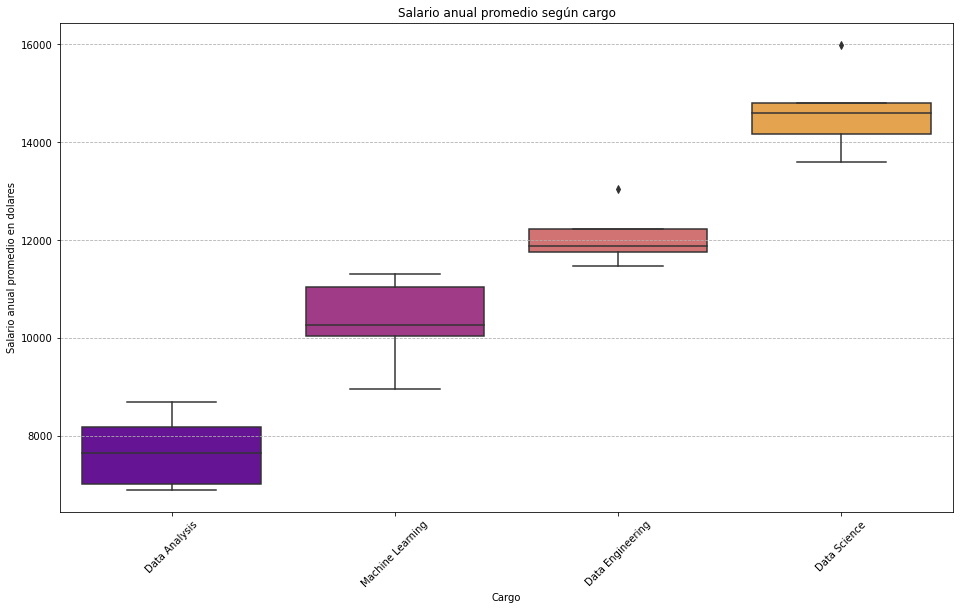

In [74]:
salario_cargo_avg = df.groupby(['Location','Area'])[['Area','Salario_anual']].agg('mean').sort_values('Salario_anual').reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=salario_cargo_avg, x='Area', y='Salario_anual', hue='Location', palette='plasma')
plt.title('Salario anual promedio según locación y cargo')
plt.xlabel('Cargo')
plt.ylabel('Salario anual promedio en dolares')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

plt.figure(figsize=(16,9))
sns.boxplot(data=salario_cargo_avg, x='Area', y='Salario_anual', palette='plasma')
plt.title('Salario anual promedio según cargo')
plt.xlabel('Cargo')
plt.ylabel('Salario anual promedio en dolares')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

* Se puede ver que la profesión de Data Science tiene el salario promedio más alto 
* Por último veremos que compañias son las que pagan más a sus empleados

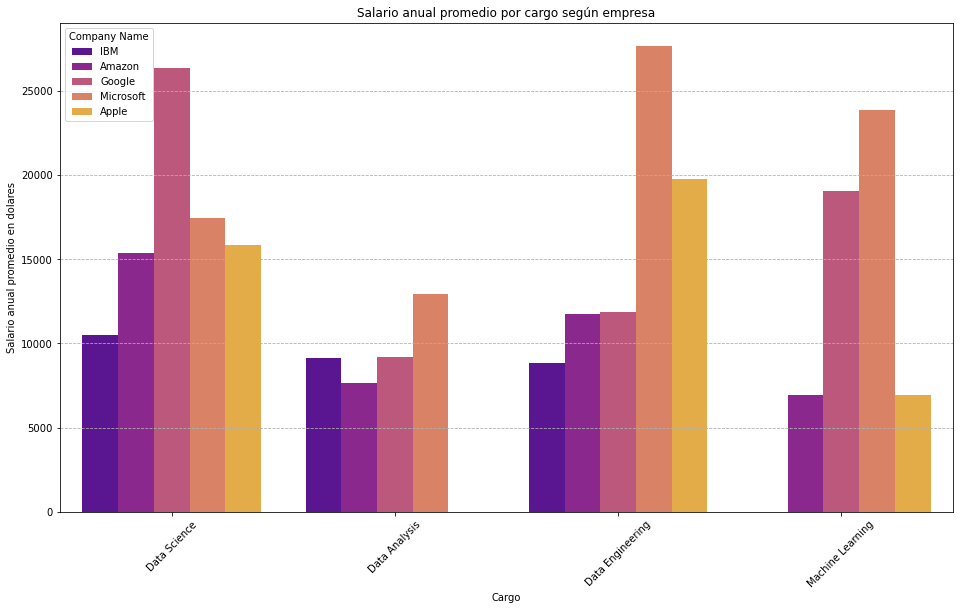

In [76]:
df_bigtech = df.copy()

df_bigtech['Company Name'].loc[df['Company Name'].str.contains('Apple')] = 'Apple'
df_bigtech['Company Name'].loc[df['Company Name'].str.contains('Google')] = 'Google'
df_bigtech['Company Name'].loc[df['Company Name'].str.contains('Microsoft')] = 'Microsoft'
df_bigtech['Company Name'].loc[df['Company Name'].str.contains('IBM')] = 'IBM'
df_bigtech['Company Name'].loc[df['Company Name'].str.contains('Amazon')] = 'Amazon'

df_bigtech = df_bigtech.loc[(df_bigtech['Company Name']=='Apple')|
                           (df_bigtech['Company Name']=='Google')|
                           (df_bigtech['Company Name']=='Microsoft')|
                           (df_bigtech['Company Name']=='IBM')|
                           (df_bigtech['Company Name']=='Amazon')]

plt.figure(figsize=(16,9))
sns.barplot(data=df_bigtech, x='Area', y='Salario_anual', hue='Company Name',ci=None, palette='plasma')
plt.title('Salario anual promedio por cargo según empresa')
plt.xlabel('Cargo')
plt.ylabel('Salario anual promedio en dolares')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

* Se puede ver que IBM y Amazon son de las grandes empresas tecnológicas que menos pagan de las 5 elegidas, además se puede notar que Apple no tiene Data Analysis reportados y que IBM no cuenta con personal dedicado a Machine Learning en este reporte